# 4주차 과제

### 슬라이드 실행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

make_blobs는 default일 때, 특성을 2개, 클래스를 3개 갖는 총 100개의 sample을 생성하는 함수

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


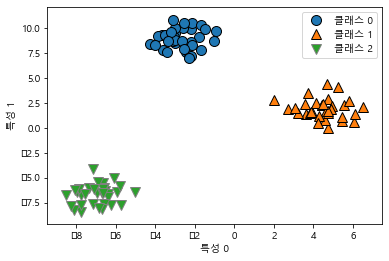

In [3]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [4]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X,y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열:
 [[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


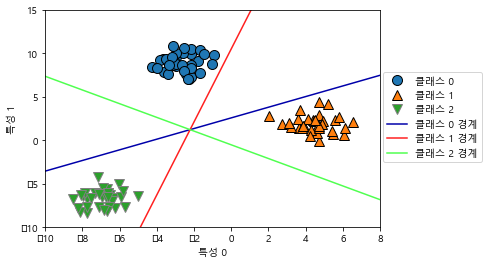

In [8]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01,0.3))
print("계수 배열:\n", logr.coef_)

In [6]:
logrOvr = LogisticRegression(multi_class = 'ovr').fit(X,y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열:
 [[-0.68329705  1.06169509]
 [ 1.36537961 -0.32670774]
 [-0.61161973 -0.73287599]]


C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


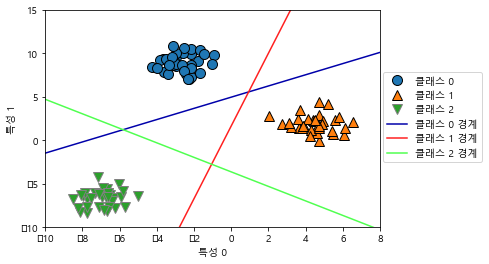

In [9]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logrOvr.coef_, logrOvr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01,0.3))
print("계수 배열:\n", logrOvr.coef_)

아래 두 그래프를 통해 색이 겹치는 영역은 절반을 나누어 가까운 클래스가 있는 쪽으로 분류됨을 알 수 있습니다.  
특히, 'ovr'의 가운데 삼각형을 보면 더욱 선명하게 볼 수 있습니다.

Text(0, 0.5, '특성 1')

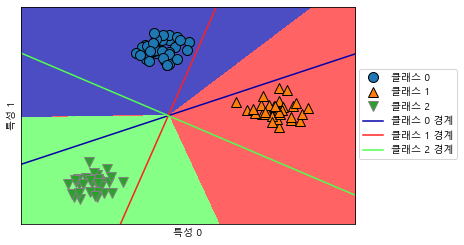

In [11]:
mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/ coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

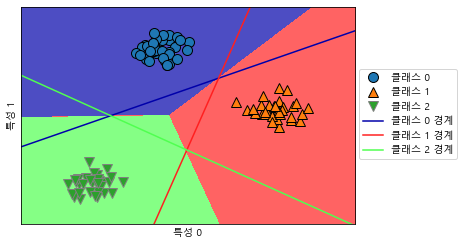

In [12]:
mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logrOvr.coef_, logrOvr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/ coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

아래의 iris 데이터에 대해서는 multinomial이 ovr에 비해서 성능이 좋음을 confusion_matrix를 통해서 확인할 수 있습니다.

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                   random_state=0, test_size=0.40)
logr = LogisticRegression().fit(X, y)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("테스트 세트의 정확도: {:.2f}".format(logr.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
테스트 세트의 정확도: 0.92
Number of mislabeled points out of a total 60 points : 5


In [8]:
logrOvr = LogisticRegression(multi_class = 'ovr').fit(X, y)
logrOvr.fit(X_train, y_train)
y_pred = logrOvr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("테스트 세트의 정확도: {:.2f}".format(logrOvr.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 20  3]
 [ 0  3 18]]
테스트 세트의 정확도: 0.90
Number of mislabeled points out of a total 60 points : 6


In [24]:
print("predict:\n", logr.predict(X_test[:30]))
print("predict:\n", logrOvr.predict(X_test[:30]))
print("probability:\n", logr.predict_proba(X_test[:30]))
print("probability:\n", logrOvr.predict_proba(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
predict:
 [2 1 0 2 0 2 0 2 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
probability:
 [[3.31268622e-04 1.22812782e-01 8.76855949e-01]
 [1.49073655e-02 9.68438212e-01 1.66544225e-02]
 [9.87117165e-01 1.28825421e-02 2.92956826e-07]
 [3.90825442e-06 4.07650401e-02 9.59231052e-01]
 [9.70874163e-01 2.91252303e-02 6.06746465e-07]
 [6.11405883e-06 1.15477255e-02 9.88446160e-01]
 [9.82263653e-01 1.77360426e-02 3.04444891e-07]
 [4.18438946e-03 7.27172728e-01 2.68642882e-01]
 [2.31528229e-03 7.61349534e-01 2.36335183e-01]
 [2.61148377e-02 9.31808632e-01 4.20765305e-02]
 [2.53911902e-04 3.18879994e-01 6.80866094e-01]
 [9.79354747e-03 7.84459210e-01 2.05747243e-01]
 [5.77051317e-03 8.37816949e-01 1.56412538e-01]
 [4.45378311e-03 7.90211050e-01 2.05335167e-01]
 [5.61604135e-03 7.61348215e-01 2.33035744e-01]
 [9.83304175e-01 1.66955727e-02 2.52473549e-07]
 [9.29207750e-03 7.96124175e-01 1.94583747e-01]
 [1.42542642e-02 8.9985469

class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)  

priors : array-like of shape (n_classes,)  
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.  
클래스의 사전 확률, 데이터에 따라서 조정되지 않는다.  

var_smoothing : float, default=1e-9  
Portion of the largest variance of all features that is added to variances for calculation stability.  
계산의 안정성을 위해서 분산에 추가되는 모든 features들의 가장 큰 부분 분산  

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size = 0.40)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size = 0.30)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size = 0.33)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Accuracy:  1.0
Number of mislabeled points out of a total 38 points : 0
Accuracy:  0.9333333333333333
Number of mislabeled points out of a total 60 points : 4
Accuracy:  1.0
Number of mislabeled points out of a total 45 points : 0
Accuracy:  0.96
Number of mislabeled points out of a total 50 points : 2


In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

classifierGN = GaussianNB().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(classifierGN.score(X_test, y_test)))

logr = LogisticRegression().fit(X_train, y_train)
print("logr 훈련 세트 점수: {:.3f}".format(logr.score(X_train, y_train)))
print("logr 테스트 세트 점수: {:.3f}".format(logr.score(X_test, y_test)))

훈련 세트 점수: 0.946
테스트 세트 점수: 0.937
logr 훈련 세트 점수: 0.941
logr 테스트 세트 점수: 0.965


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, 
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features=None, random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, 
presort=False)  

criterion : {“gini”, “entropy”}, default=”gini” 
split시 gini지수 or entropy(information gain)지수  

splitter : {“best”, “random”}, default=”best” 
분할시 선택하는 데 사용되는 전략, best는 최상의 분할을, random은 최상의 무작위 분할을 할 때 사용합니다.  

max_depth : int, default=None  
tree의 최대 깊이, None이면 모든 잎이 pure(하나의 클래스만)할 때까지 또는 모든  leaves가 min_samples_split개수 미만이 될 때까지 확장됩니다.  

min_samples_split : int or float, default=2  
노드를 분할하는데 필요한 최소 샘플 수  

min_samples_leaf : int or float, default=1  
leaf 노드에 있어야 하는 최소 샘플 수  

min_weight_fraction_leaf : float, default=0.0  
leaf 노드에 있어야 하는 총 가중치의 최소 가중치 비율  

max_features : int, float or {“auto”, “sqrt”, “log2”}, default=None  
최상의 분할을 찾을 때 고려할 feature의 수  
If “auto”, then max_features=sqrt(n_features)  
If “sqrt”, then max_features=sqrt(n_features)  
If “log2”, then max_features=log2(n_features)  
If None, then max_features=n_features  

max_leaf_nodes : int, default=None  
리프 노드의 최대 개수  

In [12]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples = 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.840


같은 데이터에 대해서 depth를 제한함으로써 훈련 세트의 정확도를 떨어뜨림과 동시에 과적합을 방지함을 볼 수 있다.

In [13]:
tree4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree4.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree4.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree4.score(X_test, y_test)))

훈련 세트 정확도: 0.933
테스트 세트 정확도: 0.800


아래의 경우 depth가 4일 때가 8일 때보다 훈련 정확도는 떨어지지만 테스트 정확도는 더 높은 것을 보아 8일 때 과적합된 것을 알 수 있다.

In [14]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))

for max_depth in [1, 4, 8]:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print("max_depth= {}".format(max_depth))
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

X_train.shape: (426, 30) X_test.shape: (143, 30)
max_depth= 1
훈련 세트 정확도: 0.923
테스트 세트 정확도: 0.923
max_depth= 4
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951
max_depth= 8
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [15]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

with 문은 파일을 열고 with문 안에서 작업이 모두 끝나면 자동으로 close해주는 문법입니다.

아래의 그래프를 통해서 매 노드마다 가장 분류가 잘 되는 다른 특성들을 통해서 확장해가는 것을 볼 수 있습니다.

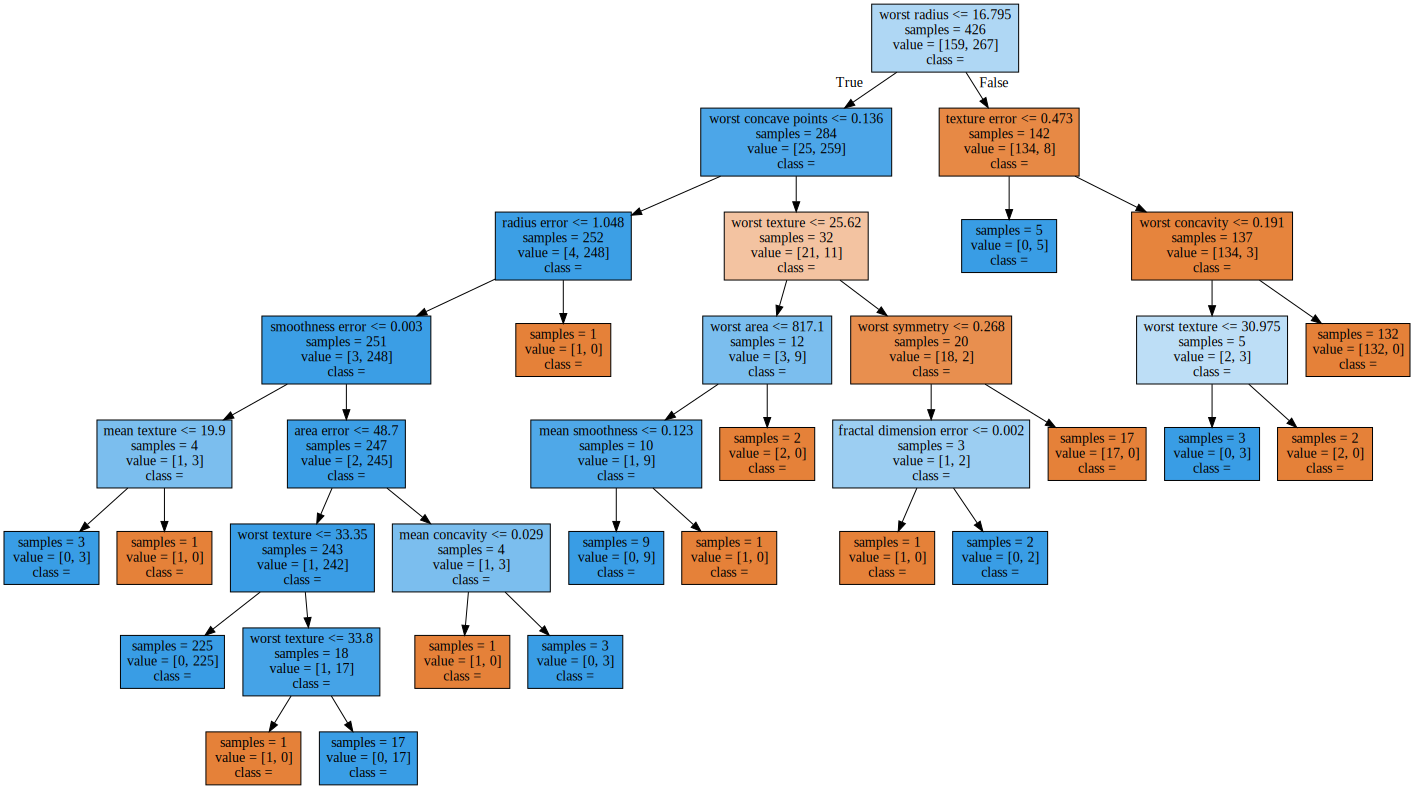

In [16]:
import graphviz

with open("tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [17]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


bar는 세로 막대를, barh는 가로 막대 그래프를 그리는 함수입니다.
yticks는 y축의 눈금을 표시하기 위해서 사용하는 함수입니다.

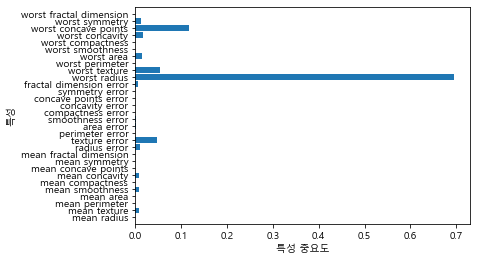

In [23]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


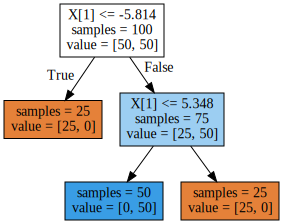

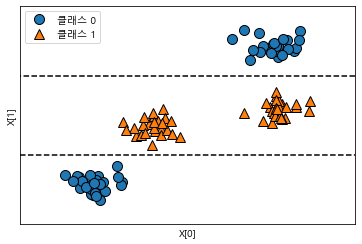

In [24]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

semilogy() 함수는 Y 축을 따라 로그 배율이 지정된 플롯을 만듭니다.

ram_prices.shape: (333, 3)
ram_prices.keys: Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격 ($/Mbyte)')

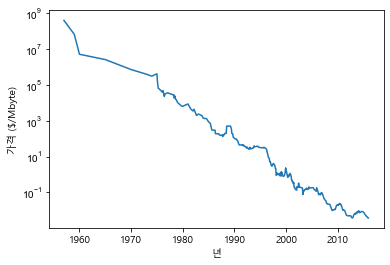

In [27]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

print("ram_prices.shape: {}".format(ram_prices.shape))
print("ram_prices.keys: {}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print("data_train.shape: {}".format(data_train.shape), "data_test.shape: {}".format(data_test.shape))

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 하기 위해 로그 스케일로 변경
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측 기간은 전체 기간
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape: (202, 3) data_test.shape: (131, 3)


<ipython-input-28-92968216cfc0>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-28-92968216cfc0>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


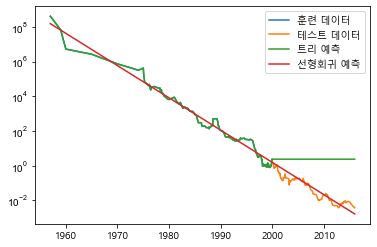

In [29]:
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

아래의 붓꽃 분류 과정에서 gini와 entropy지수를 사용했을 때 분류가 똑같이 되었음을 볼 수 있었습니다.

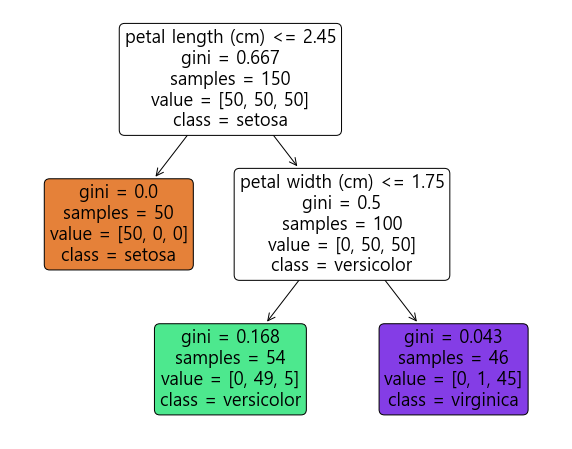

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=iris.feature_names[2:],
    class_names=iris.target_names, rounded=True, filled=True)

graphviz.Source.from_file("iris_tree.dot")

from sklearn.tree import plot_tree
# plot_tree
#filled=True : 클래스별로 색깔구분
#rounded = true
#max_depth = 2, 출력의 단계를 결정할 수 있다.
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded = True,  max_depth=2,
          feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

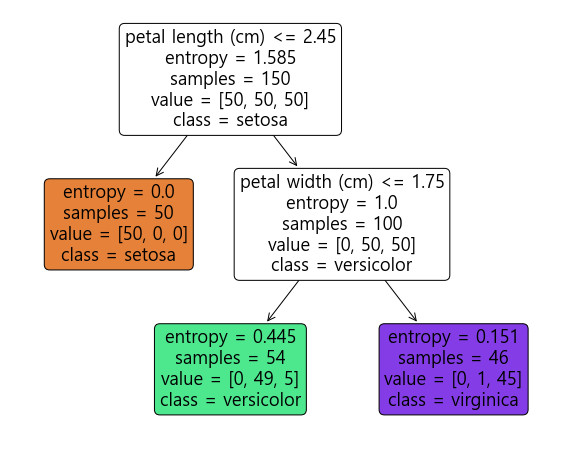

In [33]:
tree_clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
tree_clf_entropy.fit(X, y)

export_graphviz(tree_clf_entropy, out_file="tree_clf_entropy.dot", feature_names=iris.feature_names[2:],
    class_names=iris.target_names, rounded=True, filled=True)

graphviz.Source.from_file("tree_clf_entropy.dot")

# plot_tree
#filled=True : 클래스별로 색깔구분
#rounded = true
#max_depth = 2, 출력의 단계를 결정할 수 있다.
plt.figure(figsize=(10,8))
plot_tree(tree_clf_entropy, filled=True, rounded = True,  max_depth=2,
          feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 10: 0.840



In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
dt.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test, y_test)))

cvscores_dt = cross_val_score(dt, X, y, cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores_dt.mean()))

cvscores_dt = cross_val_score(dt, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores_dt.mean()))

테스트 세트 정확도: 0.880

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 10: 0.850



확실히 n_estimators의 값을 키우니 과대적합된 감이 있지만 그래도 모든 경우에서 정확도가 올라감을 알 수 있었습니다.

In [39]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}".format(cvscores.mean()))
print(cvscores)

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 10: 0.910
[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


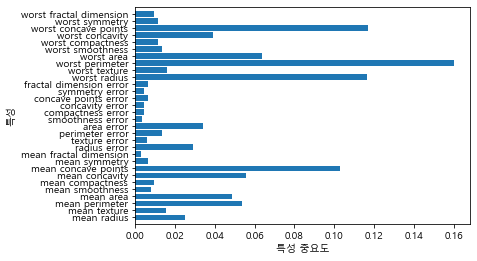

In [40]:
plot_feature_importances_cancer(forest)

class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', 
learning_rate=0.1, n_estimators=100, subsample=1.0, 
criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
min_impurity_split=None, init=None, random_state=None, 
max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, 
tol=0.0001, ccp_alpha=0.0)

loss : {‘deviance’, ‘exponential’}, default=’deviance’ 
최적화를 위해 사용할 손실 함수입니다.  

learning_rate : float, default=0.1  
각 트리에서의 학습률을 조정합니다. n_estimators와 trade-off 관계입니다.  

criterion{‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’ 
friedman_mse는 improvement score가 있는 평균 제곱 오차  
mse는 평균 제곱 오차  
mae는 평균 절대 오차  
일반적으로 friedman_mse가 가장 좋습니다.  

verbose : int, default=0
자세한 출력을 활성화합니다. 1이면 가끔씩 진행률과 성능을 인쇄합니다. (트리가 많을수록 빈도가 낮음). 1보다 크면 모든 트리에 대한 진행률과 성능을 인쇄합니다.

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [44]:
cvscores = cross_val_score(gbrt, X, y, cv = 5)
print("테스트 세트 정확도 CV = 5: {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(gbrt, X, y, cv = 10)
print("테스트 세트 정확도 CV = 10: {:.3f}".format(cvscores.mean()))

테스트 세트 정확도 CV = 5: 0.850
테스트 세트 정확도 CV = 10: 0.890


In [45]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
cvscores = cross_val_score(gbrt, X, y, cv = 5)
print("테스트 세트 정확도 CV = 5: {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(gbrt, X, y, cv = 10)
print("테스트 세트 정확도 CV = 10: {:.3f}".format(cvscores.mean()))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 5: 0.870
테스트 세트 정확도 CV = 10: 0.890


In [46]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
cvscores = cross_val_score(gbrt, X, y, cv = 5)
print("테스트 세트 정확도 CV = 5: {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(gbrt, X, y, cv = 10)
print("테스트 세트 정확도 CV = 10: {:.3f}".format(cvscores.mean()))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965
테스트 세트 정확도 CV = 5: 0.860
테스트 세트 정확도 CV = 10: 0.870


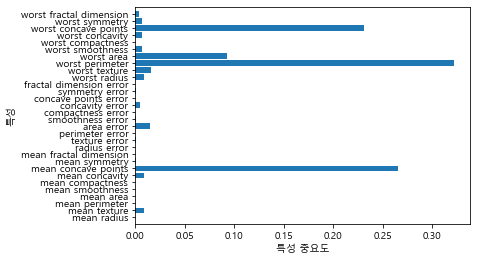

In [47]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

### 조정 및 테스트

make_blobs의 random_state값을 조정하다 보니 우연히 linear한 느낌의 3클래스의 샘플들이 생성되었고, 이 때, 영역을 어떻게 구분할지 궁금해서 테스트한 결과, 구분선은 정확히 어떤 의미인지 잘 모르겠으나, ovr과 multinomial 모두 적절하게 영역을 구분하고 있음을 확인했습니다.

C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


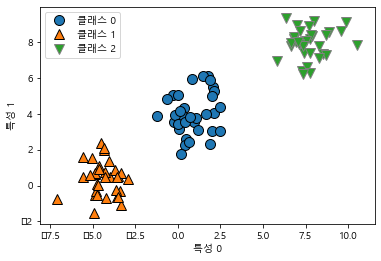

In [48]:
X,y = make_blobs(random_state=3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

Text(0, 0.5, '특성 1')

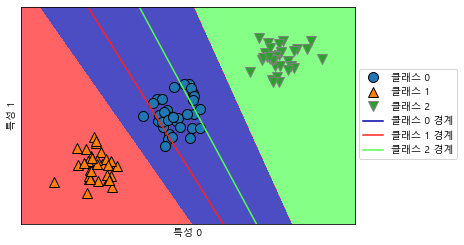

In [49]:
logr = LogisticRegression().fit(X,y)

mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/ coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

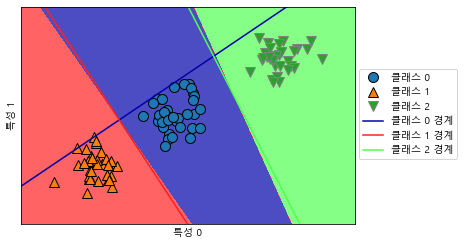

In [50]:
logrOvr = LogisticRegression(multi_class = 'ovr').fit(X,y)

mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logrOvr.coef_, logrOvr.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/ coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

cancer data에 Gaussian Naive Bayes를 적용하였을 때, 오차행렬을 통해서 총 143개의 data 중 134개가 정확히 예측함을 알 수 있었고 134/143 = 0.9370629의 값을 통해서 예시에서 테스트 세트 점수인 0.937과 같은 값임을 확인할 수 있었습니다.

In [53]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

classifierGN = GaussianNB().fit(X_train, y_train)
y_pred = classifierGN.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[46  7]
 [ 2 88]]


"DecisionTree에서 max_leaf_nodes의 수가 1이면 root만 나올까? 그렇다면 분류는 어떻게 될까?" 싶었지만 아래와 같이 1초과의 값을 입력하라는 에러가 나왔습니다. 아마도 root node의 자식 노드가 최소한 두 개는 있어야 분류할 수 있기 때문이라고 추측하였습니다.

In [55]:
X, y = make_moons(n_samples = 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeClassifier(max_leaf_nodes=1, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

ValueError: max_leaf_nodes 1 must be either None or larger than 1

max_leaf_nodes의 값을 조정하며 확인한 결과, 특정 규칙에 따라서 확장할 노드를 고르고 max_leaf_nodes의 값이 1 증가할 때마다 그 노드를 확장하는 형태의 트리가 생성됩니다.

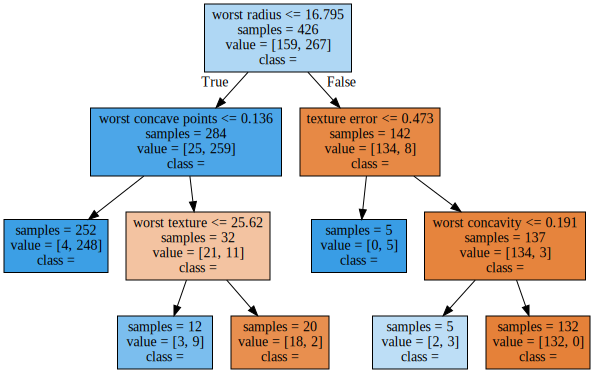

In [58]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

회귀모델의 정확도를 보기 위해서 boston 자료를 가져왔고 훈련 세트에서는 1을 보였지만 테스트 세트에서는 0.665를 보이며 과대적합되었음을 알 수 있습니다.

In [60]:
from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

tree = DecisionTreeRegressor().fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.665


파라미터 값을 바꿔가며 테스트 세트의 정확도를 높여보려고 하였으나 생각보다 크게 증가하는 값을 찾아낼 수 없었습니다.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

tree = DecisionTreeRegressor(max_depth=6, min_samples_split=15).fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.928
테스트 세트 정확도: 0.678


위의 보스턴 data에 대해서 RandomForestRegressor를 통해서 회귀해본 결과 테스트 세트의 정확도가 현저히 늘었음을 확인했습니다. 다만, 확실히 실행 과정에서 시간이 지체됨이 느껴졌고, cross validation과정에서는 정확도가 떨어지는 모습을 보였습니다.

In [79]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

cvscores_dt = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores_dt.mean()))

cvscores_dt = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores_dt.mean()))

훈련 세트 정확도: 0.982
테스트 세트 정확도: 0.795
테스트 세트 정확도 CV = 5: 0.602

테스트 세트 정확도 CV = 10: 0.514



이후 값을 바꾸며 실험해보았는데, 확실히 기본값의 성능이 좋음을 알 수 있었습니다.

In [83]:
forest = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=10, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

cvscores_dt = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores_dt.mean()))

cvscores_dt = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores_dt.mean()))

훈련 세트 정확도: 0.959
테스트 세트 정확도: 0.784
테스트 세트 정확도 CV = 5: 0.583

테스트 세트 정확도 CV = 10: 0.459



아래는 BaggingClassifier의 파라미터 중 base_estimator의 값이 None이면 decision tree가 된다는 설명을 통해 "base_estimator가 None이고, n_estimators가 1이면 decision tree와 같지 않을까?"라는 질문을 통해서 테스트한 내용입니다.  

결과를 보면 그 값이 다름을 알 수 있는데, 기본적으로 사용하는 base만 decision tree이고 그 방법은 차이가 있기 때문에 결과가 다르게 나오지 않았을까 추측하였습니다.

In [84]:
from sklearn.ensemble import BaggingClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

bg = BaggingClassifier(random_state=0)
bg.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(bg.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(bg.score(X_test, y_test)))
cvscores = cross_val_score(bg, X, y, cv = 5)
print("테스트 세트 정확도 CV = 5: {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(bg, X, y, cv = 10)
print("테스트 세트 정확도 CV = 10: {:.3f}".format(cvscores.mean()))

훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 5: 0.830
테스트 세트 정확도 CV = 10: 0.880


In [85]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test, y_test)))
cvscores_dt = cross_val_score(dt, X, y, cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores_dt.mean()))
cvscores_dt = cross_val_score(dt, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores_dt.mean()))

테스트 세트 정확도: 0.881

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 10: 0.850



In [86]:
bg1 = BaggingClassifier(n_estimators=1, random_state=0)
bg1.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(bg1.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(bg1.score(X_test, y_test)))
cvscores = cross_val_score(bg1, X, y, cv = 5)
print("테스트 세트 정확도 CV = 5: {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(bg1, X, y, cv = 10)
print("테스트 세트 정확도 CV = 10: {:.3f}".format(cvscores.mean()))

훈련 세트 정확도: 0.974
테스트 세트 정확도: 0.944
테스트 세트 정확도 CV = 5: 0.860
테스트 세트 정확도 CV = 10: 0.830
